ab)

### Training Model ###
[Iteration 0] : 2140.0278295252197, 0.650883525928695, 0.6874718773747147
[Iteration 1000] : 644.9069852490148, 0.5686440938370512, 0.6721531036624581
[Iteration 2000] : 644.4893543711225, 0.5689162757248191, 0.6723032999955221
[Iteration 3000] : 644.0618861127256, 0.5691941331464101, 0.6724571019496235
[Iteration 4000] : 643.6318167341165, 0.5694718509815275, 0.6726111539308415
[Iteration 5000] : 643.1991948922348, 0.5697494189084176, 0.6727654433487589
[Iteration 6000] : 642.7640664959163, 0.5700268288358421, 0.6729199589158297
[Iteration 7000] : 642.3264775347101, 0.5703040726408766, 0.6730746893459346
[Iteration 8000] : 641.8864740695786, 0.5705811421700063, 0.6732296233580026
[Iteration 9000] : 641.4441022225379, 0.570858029241111, 0.6733847496800811
Final weights: -10.161930364897694, 0.0772103097231015, 0.0759385563308825


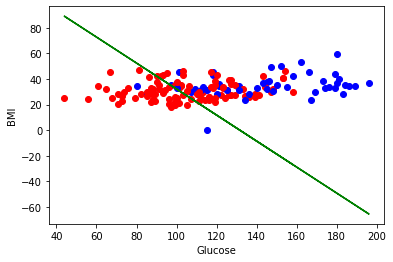

In [10]:
'''
    Logistic Regression Gradient Descent
'''
import pandas as pd
import numpy as np
import math
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def validate(data, target, weight, bias):
    z = np.dot(data.iloc[:,0], weight[0]) + np.dot(data.iloc[:,1], weight[1]) + bias
    pred = sigmoid(z)
    accuracy = 1 - (np.sum(abs(pred - target)) / len(data.iloc[:,0]))
    return accuracy

def cross_entropy(prediction, target):
    return np.dot(-target, np.log(prediction)) - np.dot(1 - target, np.log(1 - prediction))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def graph(data, target):
    for i in range(len(target)):
        if(target.iloc[i] == 0):
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='red')
        else:
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='blue')
    plt.show()

def graph_result(data, target, weight, bias):
    for i in range(len(target)):
        if(target.iloc[i] == 0):
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='red')
        else:
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='blue')

    y = - (bias + np.dot(weight[0], data.iloc[:,0])) / weight[1]
    plt.plot(data.iloc[:,0], y, color='green')
    plt.xlabel(data.columns.values[0])
    plt.ylabel(data.columns.values[1])
    plt.show()
    
'''
    log regr gradient trainer
    returns final input weights
'''
def LRGradDesc(data, target, data_test, target_test, weight_init, bias_init, learning_rate, max_iter):
    
    print("### Training Model ###")
    N = len(data.iloc[:,0])
    current_weight = [weight_init, weight_init]
    current_bias = bias_init
    theta = np.zeros((data.shape[1], 1))

    for i in range(max_iter):
        z = np.dot(data.iloc[:,0], current_weight[0]) + np.dot(data.iloc[:,1], current_weight[1]) + current_bias
        pred = sigmoid(z)
        diff = pred - target
        
        cost = cross_entropy(pred, target)
        current_weight[0] = current_weight[0] - ((learning_rate/N) * np.sum(data.iloc[:,0] * diff))
        current_weight[1] = current_weight[1] - ((learning_rate/N) * np.sum(data.iloc[:,1] * diff))
        current_bias = current_bias - ((learning_rate/N) * np.sum(diff))

        train_acc = 1 - (np.sum(abs(diff)) / N)
        val_acc = validate(data_test, target_test, current_weight, current_bias)

        if i % 1000 == 0:
           print("[Iteration " + str(i) + "] : " + str(cost) + ", " + str(train_acc) + ", " + str(val_acc))
 
    return current_weight, current_bias

'''
    pearson coeff feature selection
    returns top 2 feature indices
'''
def feature_selection(data, target):
    correlations = []
    for i in range(0, len(data.iloc[1,:])):
        correlations.append(pearsonr(data.iloc[:,i], target)[0])
    
    sorted_correl = sorted(correlations, reverse=True)
    return correlations.index(sorted_correl[0]), correlations.index(sorted_correl[1])

if __name__ == "__main__":

    # get file data
    data_file = pd.read_csv("data-sets/diabetes.csv")
    shuffled_data = data_file.sample(frac=1)
    X = shuffled_data.iloc[1:,:8] # Features
    y = shuffled_data.iloc[1:,8] # Target variable

    # spltting train and test data
    split_index = int(math.floor(len(y) * 0.8))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    
    # get optimal pearson features
    key_features = feature_selection(X_train, y_train)

    # train model
    weight, bias = LRGradDesc(X_train.iloc[:, [key_features[0], key_features[1]]], y_train, X_test.iloc[:, [key_features[0], key_features[1]]], y_test, 0, -10, 0.001, 10000)
    print("Final weights: " + str(bias) + ", " + str(weight[0]) + ", " + str(weight[1]))
    graph_result(X_test.iloc[:, [key_features[0], key_features[1]]], y_test, weight, bias)

c)

I found a larger learning rate such as 0.1 - 0.01 to have quite poor accuracy, where very small learning rates such as < 0.0001 to have very little ability for weight adjustment. I found the learning rate 0.001 to be the best balance for this application.

d)

Final Weights: [-7.39716665], [[0.03532297 0.07223148]]
Final Accuracy: 0.7467532467532467


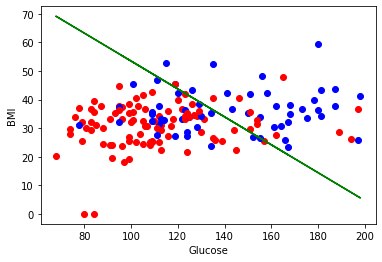

In [9]:
'''
    Logistic Regression Gradient Descent using sklearn
'''
import pandas as pd
import numpy as np
import math
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def graph_result(data, target, model):
    for i in range(len(target)):
        if(target.iloc[i] == 0):
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='red')
        else:
            plt.scatter(data.iloc[i,0], data.iloc[i,1], color='blue')
    
    y = - (model.intercept_[0] + np.dot(model.coef_[0][0], data.iloc[:,0])) / model.coef_[0][1]
    plt.plot(data.iloc[:,0], y, color='green')
    plt.xlabel(data.columns.values[0])
    plt.ylabel(data.columns.values[1])
    plt.show()

'''
    pearson coeff feature selection
    returns top 2 feature indices
'''
def feature_selection(data, target):
    correlations = []
    for i in range(0, len(data.iloc[1,:])):
        correlations.append(pearsonr(data.iloc[:,i], target)[0])
    
    sorted_correl = sorted(correlations, reverse=True)
    return correlations.index(sorted_correl[0]), correlations.index(sorted_correl[1])

if __name__ == "__main__":

    # get file data
    data_file = pd.read_csv("data-sets/diabetes.csv")
    shuffled_data = data_file.sample(frac=1)
    X = shuffled_data.iloc[1:,:8] # Features
    y = shuffled_data.iloc[1:,8] # Target variable

    # spltting train and test data
    split_index = int(math.floor(len(y) * 0.8))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    # get optimal pearson features
    key_features = feature_selection(X_train, y_train)

    # train model
    model = LogisticRegression()
    model.fit(X_train.iloc[:, [key_features[0], key_features[1]]], y_train)
    
    # make predictions
    pred = model.predict(X_test.iloc[:, [key_features[0], key_features[1]]])
    accuracy = accuracy_score(pred, y_test)
    weights = model.coef_
    print("Final Weights: " + str(model.intercept_) + ", " + str(weights))
    print("Final Accuracy: " + str(accuracy))

    graph_result(X_test.iloc[:, [key_features[0], key_features[1]]], y_test, model)

e)

Using Glucose, BMI, and Diabetes Predigree Function as parameters

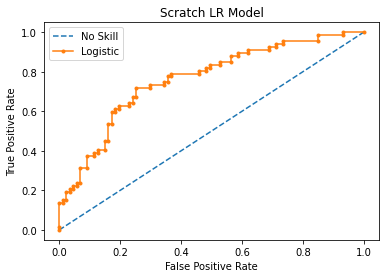

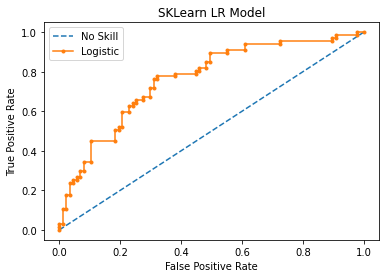

In [11]:
'''
    Logistic Regression Gradient Descent w/ ROC curve
'''
import pandas as pd
import numpy as np
import math
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LogisticRegression

def validate(data, target, weight, bias):
    z = np.dot(data.iloc[:,0], weight[0]) + np.dot(data.iloc[:,1], weight[1]) + bias
    pred = sigmoid(z)
    accuracy = 1 - (np.sum(abs(pred - target)) / len(data.iloc[:,0]))
    return accuracy

def cross_entropy(prediction, target):
    return np.dot(-target, np.log(prediction)) - np.dot(1 - target, np.log(1 - prediction))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weight, bias):
    z = np.dot(X.iloc[:,0], weight[0]) + np.dot(X.iloc[:,1], weight[1]) + np.dot(X.iloc[:,2], weight[2]) + bias
    return sigmoid(z)

def probability(pred):
    reg_odds = np.exp(pred)
    return reg_odds / (1 + reg_odds)
    
'''
    log regr gradient trainer
    returns final input weights
'''
def LRGradDesc(data, target, data_test, target_test, weight_init, bias_init, learning_rate, max_iter):
    
    N = len(data.iloc[:,0])
    current_weight = [weight_init, weight_init, weight_init]
    current_bias = bias_init
    theta = np.zeros((data.shape[1], 1))

    for i in range(max_iter):
        z = np.dot(data.iloc[:,0], current_weight[0]) + np.dot(data.iloc[:,1], current_weight[1]) + np.dot(data.iloc[:,2], current_weight[2]) + current_bias
        pred = sigmoid(z)
        diff = pred - target
        
        cost = cross_entropy(pred, target)
        current_weight[0] = current_weight[0] - ((learning_rate/N) * np.sum(data.iloc[:,0] * diff))
        current_weight[1] = current_weight[1] - ((learning_rate/N) * np.sum(data.iloc[:,1] * diff))
        current_weight[2] = current_weight[2] - ((learning_rate/N) * np.sum(data.iloc[:,2] * diff))
        current_bias = current_bias - ((learning_rate/N) * np.sum(diff))

        train_acc = 1 - (np.sum(abs(diff)) / N)
        val_acc = validate(data_test, target_test, current_weight, current_bias)
 
    return current_weight, current_bias

if __name__ == "__main__":

    # get file data
    data_file = pd.read_csv("data-sets/diabetes.csv")
    shuffled_data = data_file.sample(frac=1)
    X = shuffled_data.iloc[1:,:8] # Features
    y = shuffled_data.iloc[1:,8] # Target variable

    # spltting train and test data
    split_index = int(math.floor(len(y) * 0.8))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]
    key_features = [1, 5, 6]

    # train models
    weight, bias = LRGradDesc(X_train.iloc[:, [key_features[0], key_features[1], key_features[2]]],
        y_train, X_test.iloc[:, [key_features[0], key_features[1], key_features[2]]], y_test, 0, -10, 0.001, 2000)

    model = LogisticRegression()
    model.fit(X_train.iloc[:, [key_features[0], key_features[1], key_features[2]]], y_train)
   
    ns_probs = [0 for _ in range(len(y_test))]
    probs = probability(predict(X_test.iloc[:, [key_features[0], key_features[1], key_features[2]]], weight, bias))
    probs_canned = model.predict_proba(X_test.iloc[:, [key_features[0], key_features[1], key_features[2]]])
    probs_canned = probs_canned[:, 1]

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Scratch LR Model')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    plt.clf()
    # calculate roc curves
    ns_fpr1, ns_tpr1, _ = roc_curve(y_test, ns_probs)
    lr_fpr1, lr_tpr1, _ = roc_curve(y_test, probs_canned)
    # plot the roc curve for the model
    plt.plot(ns_fpr1, ns_tpr1, linestyle='--', label='No Skill')
    plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SKLearn LR Model')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()